# Module 5: Ordinary Differential Equations

### PROBLEM 1 (25 pts.; 50/50 for code & discussion) 
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits. 

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(15 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$. 

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(10 pts.)*

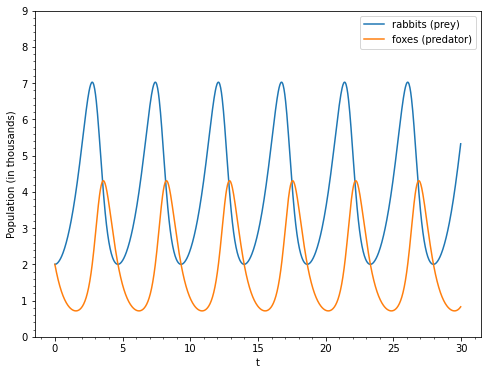

In [1]:
import numpy as np
import matplotlib.pyplot as plt

alpha, beta, gamma, delta=1.,0.5,0.5,2.

def f(r,t):
  x = r[0]
  y = r[1]
  fx = alpha*x-beta*x*y
  fy = gamma*x*y-delta*y
  return np.array([fx,fy],float) 

a,b,N=0,30,1000
h=(b-a)/N

tpoints=np.arange(a,b,h)
xpoints = []
ypoints = []

r=np.array([2.0,2.0],float)

for t in tpoints:
  xpoints.append(r[0])
  ypoints.append(r[1])
  k1 = h*f(r,t)
  k2 = h*f(r+0.5*k1,t+0.5*h)
  k3 = h*f(r+0.5*k2,t+0.5*h)
  k4 = h*f(r+k3,t+h)
  r+=(k1+2*k2+2*k3+k4)/6
plt.figure(figsize=(8,6))
plt.plot(tpoints,xpoints,label="rabbits (prey)")
plt.plot(tpoints,ypoints,label="foxes (predator)")
plt.xlabel("t")
plt.ylabel("Population (in thousands)")
plt.ylim(0,9)
plt.legend(loc="best")
plt.minorticks_on()
plt.show()

**PROBLEM 1 Discussion**

First, the given equations describing the population of both the rabbits and foxes were defined. Then, the fourth-order Runge-Kutta method was carried out to solve ODE's by utilizing 5 key equations. This produces a solution that is accurate to the fourth-order and has an error in the fifth-order. The result was then visualized by ploting the behavior of the populations across time.

Analyzing the resulting plot, we can see that as the rabbit population increases, not too long, we can also observe an increase in the fox population. A decrease in the rabbit population also kickstarts the decrease of the fox population. Hence, we can say that the population of rabbits serves as the limiting factor that directly affects the behavior of the fox population.

### PROBLEM 2 (25 pts.; 50/50 for code & discussion)

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(15 pts.)*

2. Make a graph of $\theta$ as a function of time. *(10 pts.)*


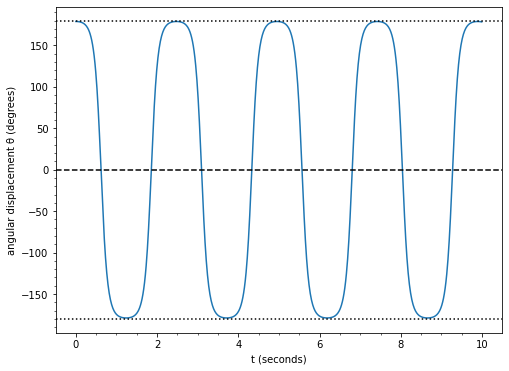

In [2]:
import numpy as np
import matplotlib.pyplot as plt

g=9.8
l=0.1

def f(r,t):
  theta = r[0]
  omega = r[1]
  ftheta = omega
  fomega = -(g/l)*np.sin(theta)
  return np.array([ftheta,fomega],float)

a,b,N=0,10,1000
h=(b-a)/N

tpoints=np.arange(a,b,h)
thetapoints = []
omegapoints = []

r=np.array([179*np.pi/180,0],float)

for t in tpoints:
  thetapoints.append(r[0])
  omegapoints.append(r[1])
  k1 = h*f(r,t)
  k2 = h*f(r+0.5*k1,t+0.5*h)
  k3 = h*f(r+0.5*k2,t+0.5*h)
  k4 = h*f(r+k3,t+h)
  r+=(k1+2*k2+2*k3+k4)/6

plt.figure(figsize=(8,6))
plt.plot(tpoints,np.array(thetapoints)*180/np.pi)
plt.axhline(0, color="black", ls='--')
plt.axhline(180, color="black", ls=':')
plt.axhline(-180, color="black", ls=':')
plt.xlabel("t (seconds)")
plt.ylabel("angular displacement \u03B8 (degrees)")
plt.minorticks_on() 
plt.show()

**PROBLEM 2 Discussion**

The process in solving this problem is fairly similar to the previous problem. Initially, Eqs. (8.45) and (8.46) were defined. Then, the Runge-Kutta method was used to solve the ODE's. The result was then converted to degrees and plotted across time. 

This $\theta$ vs. $t$ plot of a nonlinear pendulum initially displaced at $\theta=179^\circ$ has a wider periodic plot if we were to compare it with a linear pendulum. The plot also seem to have flatten crests and troughs.


### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Quantum Oscillators**

_Refer to Exercise 8.14 of the Newman text_ Consider the one-dimensional, time-independent Schrodinger equation in a harmonic (i.e., quadratic) potential $V(x) = V_0 x^2 / a^2$, where $V_0$ and $a$ are constants. 

1. Modify the code from Example 8.9 to find the energies of the ground state and the first two excited states for this potential when $m$ is the electron mass, $V_0 = 50$ eV, and $a = 10^{-11}$ m. Note that in theory the wavefunction goes all the way out to $x = \pm \infty$, but you can get good answers by using a large but finite interval. Try using $x = - 10a$ to $+10a$, with the wavefunction $\psi = 0$ at both boundaries. (In effect, you are putting the harmonic oscillator in a box with impenetrable walls.) The wavefunction is real everywhere, so you don't need to use complex variables, and you can use evenly spaced points for the solution-- there is no need to use an adaptive method for this problem.

   The quantum harmonic oscillator is known to have energy states that are equally spaced. Check that this is true, to the precision of your calculation, for your answers. (Hint: The ground state has energy in the range 100 to 200eV.) *(20 pts.)*

2. Modify the code from (1) to calculate the same three energies for the anharmonic oscillator with $V(x) = V_0 x^4 /a^4$, with the same parameter values. *(10 pts.)*

3. Calculate the properly normalized wavefunctions of the anharmonic oscillator for the three states. To normalize the wavefunctions you will have to calculate the value of the integral $\int_{-\infty}^{+\infty} |\psi(x)|^2 {\rm d}x$ and then rescale $\psi$ appropriately to ensure that the area under the square of each of the wavefunctions is 1. Either the trapezoidal rule or Simpson's rule will give you a reasonable value for the integral. *(15 pts.)*

   Note that you may find a few very large values at the end of the array holding the wavefunction. Where do these large values come from? Are they real, or spurious? One simple way to deal with the large values is to make use of the fact that the system is symmetric about its midpoint and calculate the integral of the wavefunction over only the left-hand half of the system, then double the result. This neatly misses out the large values. 

4. Make a plot of the normalized wavefunctions from (3), all on the same axes, as a function of $x$ over a modest range near the origin-- say $x = -5a$ to $x =+5a$. *(5 pts.)*



In [3]:
from numpy import array,arange

m =    9.1094e-31 
hbar = 1.0546e-34 
e =    1.6022e-19
V0 = 50 * e
a =  10 ** -11

x1 = -10 * a 
x2 = 10 * a
N =  1000
h = (x2-x1)/N

# Potential function
def V(x):
    return V0 * (x ** 2 / a ** 2)

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy
def solve(E):
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)

    for x in arange(x1,x2,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]

# Main program to find the energy using the secant method
E1=0.0
E2=0.5*e
def energy(E1,E2):
  psi2 = solve(E1)
  target = e / 1000
  while abs(E1-E2)>target:
      psi1,psi2 =psi2, solve(E2) 
      E1,E2 = E2, E2 - psi2 * (E2 - E1) / (psi2 - psi1)
  return E2/e
print("Ground state E =",energy(E1,E2),"eV")
E1=100*e
E2=270*e
print("First excited state E =",energy(E1,E2),"eV")
E1=400*e
E2=600*e
print("Second excited state E =",energy(E1,E2),"eV")

Ground state E = 138.02397124099008 eV
First excited state E = 414.0719164988695 eV
Second excited state E = 690.1198621045553 eV


**PROBLEM 2.1 Discussion**

The given potential function and ODE's relevant to a harmonic oscillator in a box with impenetrable walls were defined. Next, a function was defined to calculate the wavefunction for a specified energy value using the fourth-order Runge-Kutta method. Then, the first three energies were determined using the the secant method, a root finding algorithm, and the shooting method, a trial-and-error method.

In [4]:
# Potential function
def V(x):
    return V0 * (x ** 4 / a ** 4)

# Main program to find the energy using the secant method
E1 = 0.0
E2 = 0.5*e
E_ground2 = energy(E1,E2)
print("Ground state E =",E_ground2,"eV")
E1 = 400*e
E2 = 600*e
E_excited12 = energy(E1,E2)
print("First excited state E =",E_excited12,"eV")
E1 = 1000*e
E2 = 1200*e
E_excited22 = energy(E1,E2)
print("Second excited state E =",E_excited22,"eV")

Ground state E = 205.30690346934213 eV
First excited state E = 735.6912470402104 eV
Second excited state E = 1443.5694213150266 eV


**PROBLEM 2.2 Discussion**

Generally, the same process was used to find the first three energies of an anharmonic oscillator. The only noted difference is the value of the potential function.Comparing the calculated energy from the previous result, the energy values in each state are significantly larger.

In [5]:
import numpy as np
x1 = -5 * a
x2 = 5 * a
h = (x2-x1)/N

# Calculate the wavefunction for a particular energy and return 2 arrays: x, psi
def get_psi(E):

    # initialize
    tpoints = arange(x1,x2,h) # x -> t
    xpoints = []              # psi -> x
    ypoints = []              # phi -> y
    
    # set initial conditions
    psi = 0.0# set initial value
    phi = 1.0# set initial value
    r = array([psi,phi],float)

    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t,E)
        k2 = h*f(r+0.5*k1,t+0.5*h,E)
        k3 = h*f(r+0.5*k2,t+0.5*h,E)
        k4 = h*f(r+k3,t+h,E)
        r += (k1+2*k2+2*k3+k4)/6

    x_grid = np.array(tpoints)
    psi_grid = np.array(xpoints)
    return x_grid, psi_grid

import numpy as np
# Get wavefunction for the first 3 energy levels
E = E_ground2*e
x_grid, psi_grid1 = get_psi(E)

E = E_excited12*e
x_grid, psi_grid2 = get_psi(E)

E = E_excited22*e
x_grid, psi_grid3 = get_psi(E)

def get_integral(xx, yy):

  N = len(xx)
  s = 0.5*yy[0] + 0.5*yy[-1]
  for k in range(1,N):
    s += yy[k]

  return s

c1 = np.sqrt(get_integral(x_grid,psi_grid1**2))# insert formula
c2 = np.sqrt(get_integral(x_grid,psi_grid2**2))# insert formula
c3 = np.sqrt(get_integral(x_grid,psi_grid3**2))# insert formula
print("Normalization factors for the first 3 energy states: %.6e, %.6e, %.6e" % (c1,c2,c3))
psi_norm1 = psi_grid1/c1
psi_norm2 = psi_grid2/c2
psi_norm3 = psi_grid3/c3


Normalization factors for the first 3 energy states: 8.999405e-05, 2.530261e-05, 8.289649e-06


**PROBLEM 2.3 Discussion**

Initially, a function was defined to calculate the wavefunction using the fourth-order Runge-Kutta method. The input were each of the previously calculated energies of the anharmonic oscillator. The three resulting wavefunction corresponding to different energy states were normalized. In order to calculate the needed normalization constant, each wavefunction was squared and integrated ($-\infty$ to $\infty$) then equated to 1. The integration was carried out by a given algorithm. After the normalization constants were determined, they were divided to their corresponding wavefunction to complete the normalization process.

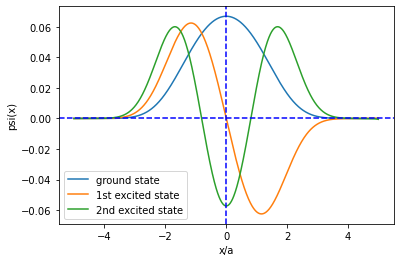

In [6]:
import matplotlib.pyplot as plt

xplot = x_grid/a 
plt.plot(xplot,psi_norm1, label="ground state") 
plt.plot(xplot,psi_norm2, label="1st excited state")  
plt.plot(xplot,psi_norm3, label="2nd excited state")

plt.axhline(0.0, ls='--', color='blue')
plt.axvline(0.0, ls='--', color='blue')
plt.xlabel("x/a") 
plt.ylabel("psi(x)")
plt.legend()
plt.show()

**PROBLEM 2.4 Discussion**

The three normalized wavefunctions corresponding to the first three states were finally plotted across $x/a$. The result accurately shows the expected behavior of an oscillator in a box. It illustrates where the oscillator will likely be detected depending on the energy level. 